















































































































































































## 0. Mount your Google Drive

Connecting To Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Import required Libraries

Library that we need to use for training the model

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import glob
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from os import walk
import os
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import save_img


Unzipping The dataset

In [ ]:
!unzip /content/drive/MyDrive/Dataset/CHS2406_Coursework2_Data_Repository-20240106T192121Z-001.zip  -d dataset


Archive:  /content/drive/MyDrive/Dataset/CHS2406_Coursework2_Data_Repository-20240106T192121Z-001.zip
  inflating: dataset/CHS2406_Coursework2_Data_Repository/Stage5/stage5_u2383309 (7).JPG  
  inflating: dataset/CHS2406_Coursework2_Data_Repository/Stage5/stage5_U2116829_6.jpg  
  inflating: dataset/CHS2406_Coursework2_Data_Repository/Stage5/stage5_U2116829_7.jpg  
  inflating: dataset/CHS2406_Coursework2_Data_Repository/Stage5/stage5_U2116829_9.jpg  
  inflating: dataset/CHS2406_Coursework2_Data_Repository/Stage5/stage5_u2383309 (1).JPG  
  inflating: dataset/CHS2406_Coursework2_Data_Repository/Stage5/stage5_u2383309 (2).JPG  
  inflating: dataset/CHS2406_Coursework2_Data_Repository/Stage5/stage5_u2383309 (4).JPG  
  inflating: dataset/CHS2406_Coursework2_Data_Repository/Stage5/stage5_u2383309 (9).JPG  
  inflating: dataset/CHS2406_Coursework2_Data_Repository/Stage5/stage5_u2383309 (10).JPG  
  inflating: dataset/CHS2406_Coursework2_Data_Repository/Stage5/stage5_U2116829_3.jpg  
  inf

## 1.1 Define your global variables

Setting Up the Global Varible for using them in the upcoming steps for traing the model

In [ ]:
# Define the  path for the data repository
BASE_DATA_PATH = '/content/dataset/CHS2406_Coursework2_Data_Repository/'

# Define  paths for training, validation, and test data
TRAINING_DATA_PATH = BASE_DATA_PATH + 'train/'
VALIDATION_DATA_PATH = BASE_DATA_PATH + 'validation/'
TEST_DATA_PATH = BASE_DATA_PATH + 'test/'

# Define hyperparameters for the model training
LEARNING_RATE = 0.001
BATCH_SIZE = 64
EPOCHS = 25

# Define data splits for training, validation, and test sets
TRAIN_SPLIT = 0.8
VALIDATION_SPLIT = 0.1
TEST_SPLIT = 0.1

# Define the image size for the input layer of the model
img_size = (150, 150, 3)

# Gather file paths for each stage of the dataset
stage1 = glob.glob('/content/dataset/CHS2406_Coursework2_Data_Repository/Stage1/*.*')
stage2 = glob.glob('/content/dataset/CHS2406_Coursework2_Data_Repository/Stage2/*.*')
stage3 = glob.glob('/content/dataset/CHS2406_Coursework2_Data_Repository/Stage3/*.*')
stage4 = glob.glob('/content/dataset/CHS2406_Coursework2_Data_Repository/Stage4/*.*')
stage5 = glob.glob('/content/dataset/CHS2406_Coursework2_Data_Repository/Stage5/*.*')
stage6 = glob.glob('/content/dataset/CHS2406_Coursework2_Data_Repository/Stage6/*.*')
stage7 = glob.glob('/content/dataset/CHS2406_Coursework2_Data_Repository/Stage7/*.*')
stage8 = glob.glob('/content/dataset/CHS2406_Coursework2_Data_Repository/Stage8/*.*')

## 2. Data Labelling Errors



# **Stage 1:**

  Stage 1: Images Left = **547**

---



1- **irrelvant image format**


 (JPEG) 1_Stage_1_u1966341.jpeg,stage1.jpeg,stage1 (2).jpeg5_Stage_1_u1966341.jpeg,stage1 (3).jpeg,4_Stage_1_u1966341.jpeg,
Stage 1.8.jpeg,Stage 1.6.jpeg,Stage 1.5.jpeg,Stage 1.2.jpeg,6_Stage_1_u1966341.jpeg,Stage_1_1974377 (1).jpeg
7_Stage_1_u1966341.jpeg,Stage_1_1974377 (10).jpeg,8_Stage_1_u1966341.jpeg,9_Stage_1_u1966341.jpeg,Stage 1.10.jpeg,Stage_1_1974377 (8).jpeg
Stage_1_1974377 (3).jpeg,Stage_1_1974377 (4).jpeg,
stage1 (6).jpeg,stage1 (7).jpeg,stage1 (8).jpeg,stage1 (9).jpeg,Stage_1_1974377 (5).jpeg,Stage_1_1974377 (5).jpeg,Stage_1_1974377 (9).jpeg


**INVALID ENVIROMENT**

1_Stage_1_u2159795.jpg,3_Stage_1_u2159795.jpg,5_Stage_1_u2159795.jpg,6_Stage_1_u2164189.jpg , 1_Stage_1_u2164189.jpg,6_Stage_1_u2164944.jpg,8_Stage_1_u2164189.jpg,9_Stage_1_u2164189.jpg
1_Stage_1_u2173617.jpg,7_Stage_1_u2159795.jpg,7_Stage_1_u2164189.jpg,9_Stage_1_u2159795.jpg,1_Stage_1_u2164944.jpg,5_Stage_1_u2164189.jpg,6_Stage_1_u2159795.jpg,10_Stage_1_u2159795.jpg,2_Stage_1_u2164189.jpg,3_Stage_1_u2164189.jpg,4_Stage_1_u2159795.jpg,4_Stage_1_u2164189.jpg


**INVALID ENVIROMENT AND INVALID FOLDER AS WELL**

(10Stage_1_u2083060..JPEG,8Stage_1_u2083060..JPEG,7Stage_1_u2083060..JPEG,6Stage_1_u2083060..JPEG,4Stage_1_u2083060..JPEG,1_Stage_2_u2173617.jpg,5Stage_1_u2083060..JPEG,1_Stage_3_u2173617.jpg,1_Stage_4_u2173617.jpg,1_Stage_5_u2173617.jpg,1_Stage_6_u2173617.jpg,
1_Stage_7_u2173617.jpg,1_Stage_8_u2173617.jpg,1_Stage_9_u2173617.jpg,1_Stage_10_u2173617.jpg)


**INVALID ENVIROMENT INVALID FORMAT CRUPTED FILE**

 (1Stage_1_u2083060.JPEG,3Stage_1_u2083060..JPEG)


 **mirror more than 2 hands**
  8_Stage_1_u2166926.jpg,10_Stage_1_u1966341.jpeg
 # **Stage 2:**
  Stage 2: Images Left = **529**

---
**irrelevant Enviroment**
 1_Stage_2_U2063353.jpg
 1_Stage_2_u2065698.jpg
1_Stage_2_u2164944.jpg  1_Stage_2_u2164189.jpg,1Stage_2_u2083060..JPEG
 2_Stage_1_u2173617.jpg, invalid 2_Stage_2_u2164189.jpg,
   2_Stage_2_u2164944.jpg
2_Stage_2_u2173617.jpg,4_Stage_2_u2164944.jpg,  4_Stage_2_u2164189.jpg,
4Stage_2_u2083060..JPEG,  5_Stage_2_u2076024.jpg,   5_Stage_2_u2164189.jpg,
  5_Stage_2_u2164944.jpg ,   5Stage_2_u2083060..JPEG,6_Stage_2_u2164944.jpg,
 6_Stage_2_u2164189.jpg,   6Stage_2_u2083060..JPEG,   7_Stage_2_u2164189.jpg,   7Stage_2_u2083060..JPEG
  8_Stage_2_u2164944.jpg,   8_Stage_2_u2164189.jpg,   8Stage_2_u2083060..JPEG,
  9_Stage_2_u2076024.jpg,   9_Stage_2_u2164189.jpg,   9_Stage_2_u2164944.jpg,   9Stage_2_u2083060..JPEG
  and stage 10_Stage_2_u2076024.jpg,   10_Stage_2_u2164189.jpg,   10_Stage_2_u2164944.jpg,
  11_Stage_2_u2159795.jpg,   10Stage_2_u2083060. copy.JPEG,   10Stage_2_u2083060. copy.JPEG,
  13_Stage_2_u2159795.jpg,   14_Stage_2_u2159795.jpg,  15_Stage_2_u2159795.jpg
  16_Stage_2_u2159795.jpg,  17_Stage_2_u2159795.jpg, 19_Stage_2_u2159795.jpg
  20_Stage_2_u2159795.jpg,
 Stage_2_u2277368_0.jpg, Stage_2_u2277368_1.jpg, Stage_2_u2277368_2.jpg,
 Stage_2_u2277368_3.jpg, Stage_2_u2277368_4.jpg, Stage_2_u2277368_5.jpg,
 Stage_2_u2277368_6.jpg, Stage_2_u2277368_7.jpg, Stage_2_u2277368_8.jpg,
 Stage_2_u2277368_9.jpg,


   3_Stage_2_u2164189.jpg,   3_Stage_2_u2164944.jpg
  3Stage_2_u2083060..JPEG,  ,   7_Stage_2_u2164944.jpg, invalid images 8_Stage_2_u2076024.jpg,
  Stage_2_1974377 (1).jpeg,   Stage_2_1974377 (3).jpeg,   Stage_2_1974377 (2).jpeg,
  Stage_2_1974377 (4).jpeg,   Stage_2_1974377 (5).jpeg,   Stage_2_1974377 (6).jpeg,
  Stage_2_1974377 (7).jpeg,   Stage_2_1974377 (8).jpeg,   Stage_2_1974377 (9).jpeg,
  Stage_2_1974377 (10).jpeg

invalid object stage2_u2383309 (1).JPG, invalid object stage2_u2383309 (2).JPG, invalid object stage2_u2383309 (3).JPG
invalid object stage2_u2383309 (4).JPG, invalid object stage2_u2383309 (5).JPG, invalid object stage2_u2383309 (6).JPG
invalid object stage2_u2383309 (7).JPG, invalid object stage2_u2383309 (8).JPG, invalid object stage2_u2383309 (9).JPG
invalid object stage2_u2383309 (10).JPG

hand missing Stage2_u2163278_IMG_2287.JPG

**invalid file  types**

stage2 (6).jpeg
stage2 (7).jpeg
stage2 (8).jpeg
stage2 (6).jpeg
stage2 (7).jpeg
stage2 (6).jpeg
Stage 2.jpeg
stage2 (3).jpeg
Stage 2-9.jpeg
stage2 (4).jpeg
Stage 2-8.jpeg
stage2 (10).jpeg
stage2 (2).jpeg
Stage 2-7.jpeg
Stage 2-6.jpeg
Stage 2-5.jpeg
Stage 2-2.jpeg
Stage 2-3.jpeg
Stage 2-4.jpeg
Stage 2-10.jpeg
25tage_2_U205860...JPEG
20_Stage_2_u1966341.jpeg
19_Stage_2_u1966341.jpeg
18_Stage_2_u1966341.jpeg
17_Stage_2_u1966341.jpeg
16_Stage_2_u1966341.jpeg
15_Stage_2_u1966341.jpeg
14_Stage_2_u1966341.jpeg
13_Stage_2_u1966341.jpeg
12_Stage_2_u1966341.jpeg
11_Stage_2_u1966341.jpeg
2_Stage_2_u2157961.JPG
Stage2_u2163278_IMG_2279.JPG
Stage2_u2163278_IMG_2247.JPG
Stage2_u2163278_IMG_2237.JPG
Stage2_u2163278_IMG_2066.JPG
Stage2_u2163278_IMG_2209.JPG
Stage2_u2163278_IMG_2227.JPG
Stage2_u2163278_IMG_2218.JPG
9_Stage_2_u2157961.JPG
8_Stage_2_u2157961.JPG
7_Stage_2_u2157961.JPG
4_Stage_2_u2157961.JPG
3_Stage_2_u2157961.JPG
1_Stage_2_u2157961.JPG

hand missing Stage2_u2163278_IMG_2287.JPG


stage2 (6).jpeg
stage2 (7).jpeg
stage2 (8).jpeg
stage2 (6).jpeg
stage2 (7).jpeg
stage2 (6).jpeg
Stage 2.jpeg
stage2 (3).jpeg
Stage 2-9.jpeg
stage2 (4).jpeg
Stage 2-8.jpeg
stage2 (10).jpeg
stage2 (2).jpeg
Stage 2-7.jpeg
Stage 2-6.jpeg
Stage 2-5.jpeg
Stage 2-2.jpeg
Stage 2-3.jpeg
Stage 2-4.jpeg
Stage 2-10.jpeg
25tage_2_U205860...JPEG
20_Stage_2_u1966341.jpeg
19_Stage_2_u1966341.jpeg
18_Stage_2_u1966341.jpeg
17_Stage_2_u1966341.jpeg
16_Stage_2_u1966341.jpeg
15_Stage_2_u1966341.jpeg
14_Stage_2_u1966341.jpeg
13_Stage_2_u1966341.jpeg
12_Stage_2_u1966341.jpeg
11_Stage_2_u1966341.jpeg
2_Stage_2_u2157961.JPG
Stage2_u2163278_IMG_2279.JPG
Stage2_u2163278_IMG_2247.JPG
Stage2_u2163278_IMG_2237.JPG
Stage2_u2163278_IMG_2066.JPG
Stage2_u2163278_IMG_2209.JPG
Stage2_u2163278_IMG_2227.JPG
Stage2_u2163278_IMG_2218.JPG
9_Stage_2_u2157961.JPG
8_Stage_2_u2157961.JPG
7_Stage_2_u2157961.JPG
4_Stage_2_u2157961.JPG
3_Stage_2_u2157961.JPG
1_Stage_2_u2157961.JPG
  # **Stage 3:**
  Stage 3: Images Left = **567**
---


**irrelevant format**
Stage 3.4
Stage 3.5
Stage 3.6
Stage 3.7
Stage 3.8
Stage 3.9
Stage 3.10
Stage 3.1
Stage_3_1974377  (1).jpeg
Stage_3_1974377  (2).jpeg
Stage_3_1974377  (3).jpeg
Stage_3_1974377  (4).jpeg
Stage_3_1974377  (5).jpeg
Stage_3_1974377  (6).jpeg
Stage_3_1974377  (7).jpeg
Stage_3_1974377  (10).jpeg
Stage_3_1974377  (9).jpeg
1Stage_3_u2083060. copy.JPEG
2Stage_3_u2083060. copy.JPEG
3Stage_3_u2083060. copy.JPEG
4Stage_3_u2083060. copy.JPEG
5Stage_3_u2083060. copy.JPEG
6Stage_3_u2083060. copy.JPEG
7Stage_3_u2083060. copy.JPEG
8Stage_3_u2083060. copy.JPEG
9Stage_3_u2083060. copy.JPEG




 **irrelivantg enviorment**
_Stage_3_u2164189.jpg
2_Stage_3_u2164189.jpg
3_Stage_3_u2164189.jpg

4_Stage_3_u2164189.jpg
5_Stage_3_u2164189.jpg
6_Stage_3_u2164189.jpg
7_Stage_3_u2164189.jpg
8_Stage_3_u2164189.jpg
9_Stage_3_u2164189.jpg
5_Stage_3_u2164944.jpg
5_Stage_3_u2164944.jpg
5_Stage_3_u2164944.jpg
5_Stage_3_u2164944.jpg
5_Stage_3_u2164944.jpg


# **Stage 4:**
  Stage 4: Images Left = **560**

---

 **invalid format**


Stage_6_1974377 (1).jpeg
27_Stage_3_u1966341.jpeg
stage4.jpeg
stage4 (8).jpeg
stage4 (9).jpeg
stage4 (7).jpeg
stage4 (6).jpeg
stage4 (5).jpeg
stage4 (4).jpeg
stage4 (3).jpeg
stage4 (2).jpeg
stage4 (10).jpeg
Stage_4_1974377 (9).jpeg
Stage_4_1974377 (7).jpeg
Stage_4_1974377 (8).jpeg
Stage_4_1974377 (6).jpeg
Stage_4_1974377 (4).jpeg
Stage_4_1974377 (5).jpeg
Stage_4_1974377 (3).jpeg
Stage_4_1974377 (2).jpeg
Stage_4_1974377 (10).jpeg
Stage_4_1974377 (1).jpeg
Stage 4.jpeg
Stage 4.9.jpeg
Stage 4.7.jpeg
Stage 4.8.jpeg
Stage 4.6.jpeg
Stage 4.5.jpeg
Stage 4.2.jpeg
Stage 4.10.jpeg
Stage 4.3.jpeg
9Stage_4_u2083060..JPEG
8Stage_4_u2083060..JPEG
7Stage_4_u2083060..JPEG
6Stage_4_u2083060..JPEG
5Stage_4_u2083060..JPEG
4Stage_4_u2083060..JPEG
3Stage_4_u2083060..JPEG
40_Stage_4_u1966341.jpeg
40_Stage_4_u1966341.jpeg
40_Stage_4_u1966341.jpeg
40_Stage_4_u1966341.jpeg
40_Stage_4_u1966341.jpeg
40_Stage_4_u1966341.jpeg
40_Stage_4_u1966341.jpeg
40_Stage_4_u1966341.jpeg
40_Stage_4_u1966341.jpeg
40_Stage_4_u1966341.jpeg
2Stage_4_u2083060..JPEG
1Stage_4_u2083060..JPEG
10Stage_4_u2083060..JPEG

**Invalid Enviroment**


35_Stage_4_u2159795.jpg
36_Stage_4_u2159795.jpg
3_Stage_4_u2076024.jpg
2Stage_4_u2083060..JPEG
9_Stage_4_u2164189.jpg
37_Stage_4_u2159795.jpg
10_Stage_4_u2164944.jpg
8_Stage_4_u2164189.jpg
10_Stage_4_u2164189.jpg
1_Stage_4_u2356627.jpg
7_Stage_4_u2164189.jpg
33_Stage_4_u2159795.jpg
38_Stage_4_u2159795.jpg
34Stage_4_u2057863.jpg
31_Stage_4_u2159795.jpg
7_Stage_4_u2164189.jpg
3_Stage_4_u2164189.jpg
39_Stage_4_u2159795.jpg
7_Stage_4_u2076024.jpg
7_Stage_4_U2063353.jpg
6_Stage_4_u2164189.jpg
31Stage_4_u2057863.jpg
4_Stage_4_u2164189.jpg
40_Stage_4_u2159795.jpg
1_Stage_4_U2063353.jpg

# **Stage 5:**
Stage 5: Images Left = **536**

---


**Invalid Format **
Stage_5_1974377 (4).jpeg
Stage_5_1974377 (32).jpeg
Stage_5_1974377 (1).jpeg
Stage_5_1974377 (10).jpeg
Stage_5.jpeg
Stage_5.8.jpeg
Stage_5.9.jpeg
Stage_5.7.jpeg
Stage_5.6.jpeg
Stage_5.5.jpeg
Stage_5.4.jpeg
Stage_5.3.jpeg
Stage_5.10.jpeg
Stage_5.2.jpeg
9Stage_5_u2083060...JPEG
8Stage_5_u2083060...JPEG
7Stage_5_u2083060...JPEG
6Stage_7_u2083060...JPEG
5Stage_5_u2083060...JPEG
50_Stage_5_u1966341.jpeg
4Stage_5_u2083060...JPEG
49_Stage_5_u1966341.jpeg
48_Stage_5_u1966341.jpeg


stage5.jpeg
stage5 (9).jpeg
stage5 (8).jpeg
stage5 (7).jpeg
stage5 (6).jpeg
stage5 (5).jpeg
stage5 (4).jpeg
stage5 (3).jpeg
stage5 (2).jpeg
stage5 (10).jpeg
Stage_5_1974377 (1).jpeg
Stage_5_1974377 (9).jpeg
Stage_5_1974377 (8).jpeg
Stage_5_1974377 (5).jpeg

**Invalid Enviroment**

1_Stage_5_u2164189.jpg

1_Stage_5_u2164944.jpg
2_Stage_5_u2157961.JPG
2_Stage_5_u2157961.JPG
3_Stage_5_u2164189.jpg
3_Stage_5_u2164944.jpg
4_Stage_5_U2063353.jpg
4_Stage_5_u2164189.jpg
4_Stage_5_u2164944.jpg
6_Stage_5_u2164189.jpg
5_Stage_1_u2173617.jpg
5_Stage_1_u2173617.jpg
5_Stage_4_u2173617.jpg
5_Stage_4_u2173617.jpg
5_stage_5_u2164507.jpg
5_Stage_5_u2164944.jpg
6_Stage_5_u2164944.jpg
7_Stage_5_u2164189.jpg
7_Stage_5_u2083251.jpg
9_Stage_5_u2083251.jpg
9_Stage_5_u2164189.jpg
9_Stage_5_u2164944.jpg
10_Stage_5_u2164189.jpg
9_Stage_5_u2356627.jpg
8_Stage_5_u2083251.jpg
10_Stage_5_u2164944.jpg
46_Stage_5_u2159795.jpg
10_Stage_5_u2083251.jpg
48_Stage_5_u2159795.jpg
50_Stage_5_u2159795.jpg
10_Stage_5_U2063353.jpg
45_Stage_5_u2159795.jpg
41_Stage_5_u2159795.jpg
47_Stage_5_u2159795.jpg
49_Stage_5_u2159795.jpg
42_Stage_5_u2159795.jpg
44_Stage_5_u2159795.jpg
43_Stage_5_u2159795.jpg

**Wrong folder & Invalid enviremnet **

5_Stage_6_u2173617.jpg
5_Stage_7_u2173617.jpg
5_Stage_8_u2173617.jpg
5_Stage_9_u2173617.jpg
5_Stage_10_u2173617.jpg

# **Stage 6:**
Stage 6: Images Left = **564**

---

**irrelivantg enviorment**


52_Stage_6_u2159795.jpg
54_Stage_6_u2159795.jpg
55_Stage_6_u2159795.jpg
56_Stage_6_u2159795.jpg
57_Stage_6_u2159795.jpg
58_Stage_6_u2159795.jpg
59_Stage_6_u2159795.jpg

# **Stage 7:**
Stage 7: Images Left = **486**

---
**invalid location **
1_Stage_7_u2076024.jpg , 1_Stage_7_u2164189.jpg, 1_Stage_7_u2164944.jpg, 4Stage_7_u2083060..JPEG, 5_Stage_7_u2164189.jpg, 5Stage_7_u2083060..JPEG
6Stage_5_u2083060..JPEG

7_Stage_1_u2173617.jpg  9_Stage_7_u2164189.jpg
2Stage_7_u2083060..JPEG 9_Stage_7_u2164944.jpg
3_Stage_7_u2164189.jpg 9Stage_7_u2083060..JPEG
3_Stage_7_u2164944.jpg 61_Stage_7_u2159795.jpg
3Stage_7_u2083060..JPEG 62_Stage_7_u2159795.jpg
4_Stage_7_u2076024.jpg 63_Stage_7_u2159795.jpg
4_Stage_7_u2164189.jpg  64_Stage_7_u2159795.jpg
4_Stage_7_u2164944.jpg 64_Stage_7_U2270595.jpg
5_Stage_7_u2164944.jpg 65_Stage_7_u2159795.jpg
6_Stage_7_u2164944.jpg 66_Stage_7_u2159795.jpg
7_Stage_1_u2173617.jpg 67_Stage_7_u2159795.jpg
7_Stage_2_u2173617.jpg 68_Stage_7_u2159795.jpg
7_Stage_3_u2173617.jpg 69_Stage_7_u2159795.jpg
7_Stage_4_u2173617.jpg Stage_7_u2277368_0.jpg
7_Stage_5_u2173617.jpg Stage_7_u2277368_1.jpg
7_Stage_6_u2173617.jpg Stage_7_u2277368_2.jpg
7_Stage_1_u2173617.jpg Stage_7_u2277368_3.jpg
7_Stage_7_u2164189.jpg Stage_7_u2277368_4.jpg
7_Stage_7_u2173617.jpg Stage_7_u2277368_5.jpg
7_Stage_7_u2173617.jpg Stage_7_u2277368_6.jpg
6_Stage_7_U2063353.jpg Stage_7_u2277368_7.jpg
6_Stage_7_u2164189.jpg Stage_7_u2277368_8.jpg
7_Stage_8_u2173617.jpg Stage_7_u2277368_9.jpg
7_Stage_9_u2173617.jpg Stage_7_u2277368_10.jpg
7_Stage_10_u2173617.jpg Stage-7-1974377 (1).jpeg
7Stage_7_u2083060..JPEG Stage-7-1974377 (2).jpeg
8_Stage_7_U2063353.jpg
8_Stage_7_u2164189.jpg
8_Stage_7_u2164944.jpg
8Stage_7_u2083060..JPEG
9_Stage_7_U2063353.jpg
Stage-7-1974377 (3).jpeg
Stage-7-1974377 (4).jpeg
Stage-7-1974377 (5).jpeg
Stage-7-1974377 (6).jpeg
Stage-7-1974377 (7).jpeg
Stage-7-1974377 (8).jpeg
Stage-7-1974377 (9).jpeg
Stage-7-1974377 (10).jpeg

invalid file type

Stage 7.3.jpeg
Stage 7 (7).jpeg
Stage 7 (8).jpeg
Stage 7 (6).jpeg
Stage 7 (5).jpeg
Stage 7 (4).jpeg
Stage 7 (9).jpeg
Stage 7.jpeg
Stage 7 (3).jpeg
Stage 7 (2).jpeg
Stage 7 (10).jpeg
Stage 7.jpeg
Stage 7.8.jpeg
Stage 7.6.jpeg
Stage 7.7.jpeg
Stage 7.7.jpeg
Stage 7.9.jpeg
Stage 7.5.jpeg
Stage 7.2.jpeg
Stage 7.10.jpeg
99_Stage_7_u1966341.jpeg
98_Stage_7_u1966341.jpeg
92_Stage_7_u1966341.jpeg
93_Stage_7_u1966341.jpeg
96_Stage_7_u1966341.jpeg
91_Stage_7_u1966341.jpeg
95_Stage_7_u1966341.jpeg
94_Stage_7_u1966341.jpeg
97_Stage_7_u1966341.jpeg
1Stage_7_u2083060.JPEG
1_Stage_7_u2157961.JPG
2_Stage_7_u2157961.JPG
3_Stage_7_u2157961.JPG
4_Stage_7_u2157961.JPG
5_Stage_7_u2157961.JPG
6_Stage_7_u2157961.JPG
7_Stage_7_u2157961.JPG
8_Stage_7_u2157961.JPG
9_Stage_7_u2157961.JPG
Stage7_u2163278_IMG_2801.JPG
Stage7_u2163278_IMG_2878.JPG
Stage7_u2163278_IMG_2888.JPG
stage7_u2383309 (1).JPG
stage7_u2383309 (2).JPG
stage7_u2383309 (3).JPG
stage7_u2383309 (4).JPG
stage7_u2383309 (5).JPG
stage7_u2383309 (6).JPG
stage7_u2383309 (7).JPG
stage7_u2383309 (8).JPG
stage7_u2383309 (9).JPG
stage7_u2383309 (10).JPG

# **Stage 8:**
  Stage 8: Images Left = **558**
---
**irrelevant format**
Stage-7-1974377 (8).jpeg
Template_Assessment2.ipynb
stage8.jpeg
stage8.jpeg
stage8.jpeg
stage8.jpeg
stage8.jpeg
stage8.jpeg
stage8.jpeg
stage8.jpeg
stage8.jpeg
stage8.jpeg
Copy of stages (9).jpeg
stage8.jpeg
stage8 (9).jpeg
stage8 (7).jpeg
stage8 (8).jpeg
stage8 (5).jpeg
stage8 (6).jpeg
stage8 (4).jpeg
stage8 (3).jpeg
stage8 (2).jpeg
stage8 (10).jpeg
Stage_8_19f4377 (9).jpeg
Stage_8_19f4377 (8).jpeg
Stage_8_19f4377 (7).jpeg
Stage_8_19f4377 (6).jpeg
Stage_8_19f4377 (5).jpeg
Stage_8_19f4377 (4).jpeg
Stage_8_19f4377 (3).jpeg
Stage_8_19f4377 (2).jpeg
Stage_8_19f4377 (10).jpeg
Stage_8_19f4377 (1).jpeg
Stage 8.jpeg
Stage 8_9.jpeg
Stage 8_8.jpegStage 8.6.jpeg
Stage 8.5.jpeg
Stage 8.7.jpeg
Stage 8.4.jpeg
Stage 8.2.jpeg
Stage 8.3.jpeg
Stage 8.10.jpeg
9Stage_8_u2083060.JPEG
8Stage_8_u2083060.JPEG
80_Stage_8_u1966341.jpeg
7Stage_8_u2083060.JPEG
79_Stage_8_u1966341.jpeg
78_Stage_8_u1966341.jpeg
77_Stage_8_u1966341.jpeg
76_Stage_8_u1966341.jpeg
75_Stage_8_u1966341.jpeg
74_Stage_8_u1966341.jpeg
73_Stage_8_u1966341.jpeg
72_Stage_8_u1966341.jpeg
71_Stage_8_u1966341.jpeg
70_Stage_8_u1966341.jpeg
6Stage_8_u2083060.JPEG
69_Stage_8_u1966341.jpeg
68_Stage_8_u1966341.jpeg
67_Stage_8_u1966341.jpeg


## 3. Loading the Data

 **count the number of files in a directory**

In [ ]:
import os
##Calculating number of files
def count_files_in_folders(root_dir):
    for dirpath, dirnames, filenames in os.walk(root_dir):
        file_count = sum(1 for f in filenames if os.path.isfile(os.path.join(dirpath, f)))
        print(f"Directory '{dirpath}' has {file_count} files")
##BASE_DATA_PATH IS THE DATA FOLDER ADDRESS
root_directory = BASE_DATA_PATH
count_files_in_folders(root_directory)


Directory '/content/dataset/CHS2406_Coursework2_Data_Repository/' has 0 files
Directory '/content/dataset/CHS2406_Coursework2_Data_Repository/Stage4' has 560 files
Directory '/content/dataset/CHS2406_Coursework2_Data_Repository/Stage2' has 529 files
Directory '/content/dataset/CHS2406_Coursework2_Data_Repository/Stage5' has 536 files
Directory '/content/dataset/CHS2406_Coursework2_Data_Repository/Stage8' has 558 files
Directory '/content/dataset/CHS2406_Coursework2_Data_Repository/Stage1' has 547 files
Directory '/content/dataset/CHS2406_Coursework2_Data_Repository/Stage3' has 567 files
Directory '/content/dataset/CHS2406_Coursework2_Data_Repository/Stage6' has 564 files
Directory '/content/dataset/CHS2406_Coursework2_Data_Repository/Stage7' has 486 files


**SETTING UP CONSTANTS AND CONFIGURATIONS FOR IMAGE PROCESSING AND MODEL EVALUATION**


In [ ]:
# Image processing
IMAGE_HEIGHT = 150
IMAGE_WIDTH = 150
IMAGE_CHANNELS = 3
NORMALIZATION_FACTOR = 255.0  # for pixel values

# Performance metrics
METRICS = ['accuracy']

# Ensure reproducibility
SEED = 42

**Coverting Images To numerical data**

In [ ]:
import tensorflow as tf
import numpy as np


data = []
labels = []

# Assuming 'stage_1', 'stage_2', ..., 'stage_8' are lists that contain the file paths for the images
for i in stage1:
    image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size=img_size)
    image = np.array(image)
    data.append(image)
    labels.append(1)

for i in stage2:
    image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size=img_size)
    image = np.array(image)
    data.append(image)
    labels.append(2)

for i in stage3:
    image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size=img_size)
    image = np.array(image)
    data.append(image)
    labels.append(3)

for i in stage4:
    image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size=img_size)
    image = np.array(image)
    data.append(image)
    labels.append(4)

for i in stage5:
    image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size=img_size)
    image = np.array(image)
    data.append(image)
    labels.append(5)

for i in stage6:
    image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size=img_size)
    image = np.array(image)
    data.append(image)
    labels.append(6)

for i in stage7:
    image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size=img_size)
    image = np.array(image)
    data.append(image)
    labels.append(7)

for i in stage8:
    image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size=img_size)
    image = np.array(image)
    data.append(image)
    labels.append(8)

# Convert lists to numpy arrays if needed
data = np.array(data)
labels = np.array(labels)


**Displaying Number Of Photos**

In [ ]:
print(len(labels))

4347


## 4. Split the data
<br>

Split the data into training, validation and testing dataset using Startification, ensuring equal class distribution.

Choose appropriate values of training, validation and testing datasets.

Display total number of images in each dataset.


**Split the data into training, validation and testing dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.4, random_state=1, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1, stratify=y_temp)

# Printing the total number of instances in each set
print("Total Training Instances:", str(len(y_train)))
print("Total Validation Instances:", str(len(y_val)))
print("Total Test Instances:", str(len(y_test)))

# Printing the distribution of classes in each set
print("Training Data:", np.unique(y_train, return_counts=True))
print("Validation Data:", np.unique(y_val, return_counts=True))
print("Test Data:", np.unique(y_test, return_counts=True))


Total Training Instances: 2608
Total Validation Instances: 869
Total Test Instances: 870
Training Data: (array([1, 2, 3, 4, 5, 6, 7, 8]), array([328, 317, 340, 336, 322, 338, 292, 335]))
Validation Data: (array([1, 2, 3, 4, 5, 6, 7, 8]), array([110, 106, 113, 112, 107, 113,  97, 111]))
Test Data: (array([1, 2, 3, 4, 5, 6, 7, 8]), array([109, 106, 114, 112, 107, 113,  97, 112]))


## 5. Pre-process Dataset

**Visualizing The Images**

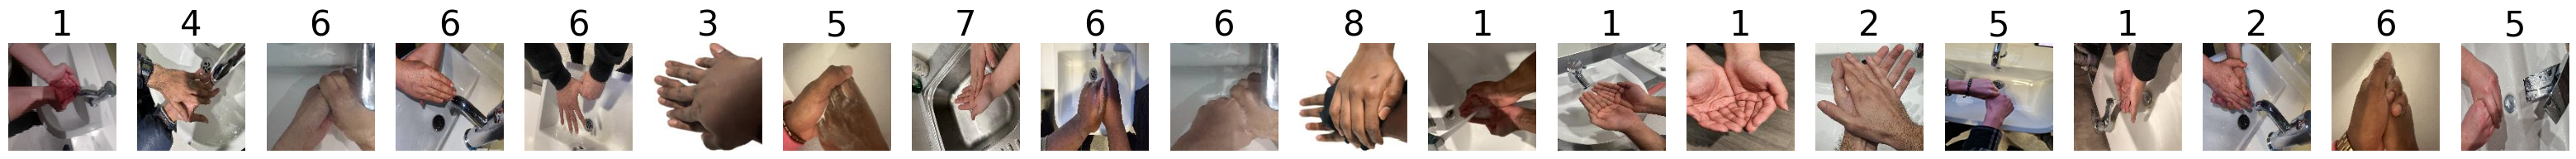

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = X_train[i]
    label = y_train[i]

    image = row
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

**Coverting Into Categorical**

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Assuming X_train, X_test, y_train, y_test are already loaded datasets

# Print the shapes before reshaping
print("Before reshaping the shape of train and test dataset:")
print(X_train.shape)
print(X_test.shape)

# Reshape the datasets (example shapes are placeholders)
X_train = X_train.reshape(X_train.shape[0], 150, 150, 3)
X_test = X_test.reshape(X_test.shape[0], 150, 150, 3)

# Print the shapes after reshaping
print("After reshaping the shape of train and test dataset:")
print(X_train.shape)
print(X_test.shape)

# Number of classes in the dataset (placeholder value)
NUM_CLASSES = 10

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

print("After conversion to categorical:")
print("The format of the labels before conversion")
print(y_train.shape)
print(y_test.shape)


Before reshaping the shape of train and test dataset:
(2608, 150, 150, 3)
(870, 150, 150, 3)
After reshaping the shape of train and test dataset:
(2608, 150, 150, 3)
(870, 150, 150, 3)
After conversion to categorical:
The format of the labels before conversion
(2608, 10)
(870, 10)


**Normalization On Image Data**

In [ ]:
import numpy as np

# Convert the array to float32 as opposed to uint8
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)

# Convert the pixel values from integers between 0 and 255 to floats between 0 and 1
X_train /= 255
X_val /= 255
X_test /= 255


## 6. Creating a Convolutional Neural Network Model

**Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization
)

model = Sequential()
model.add(Conv2D(128, (8, 8), activation="relu", input_shape=img_size))
model.add(MaxPool2D((4, 4)))
model.add(Conv2D(64, (4, 4), activation="relu"))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))

# model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
# model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=264, activation="relu"))
# model.add(Dropout(0.5))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=NUM_CLASSES, activation="softmax"))

## 7. Data Augmentation

**Image Generator**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)

**Using The Data Generator To Load Images**

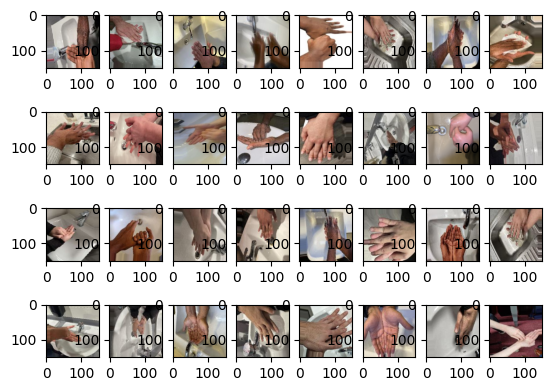

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

batch_size = 32
img_iter = datagen.flow(X_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

**Summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 128)     24704     
                                                                 
 max_pooling2d (MaxPooling2  (None, 35, 35, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        131136    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 32)          0

**Compling The Model**

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

 **Preprocessing image data for a deep learning model**

In [ ]:
datagen.fit(X_train)

## 8. Train Model

**Traing The Model**

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

# Save the model
model.save('model.h5')

Epoch 1/25
82/82 [==============================] - 7s 87ms/step - loss: 0.1690 - accuracy: 0.9494 - val_loss: 2.9582 - val_accuracy: 0.4483
Epoch 2/25
82/82 [==============================] - 4s 48ms/step - loss: 0.1421 - accuracy: 0.9590 - val_loss: 3.7704 - val_accuracy: 0.4241
Epoch 3/25
82/82 [==============================] - 4s 50ms/step - loss: 0.1518 - accuracy: 0.9536 - val_loss: 3.1882 - val_accuracy: 0.4287
Epoch 4/25
82/82 [==============================] - 4s 52ms/step - loss: 0.1381 - accuracy: 0.9517 - val_loss: 3.5520 - val_accuracy: 0.4816
Epoch 5/25
82/82 [==============================] - 4s 49ms/step - loss: 0.1340 - accuracy: 0.9567 - val_loss: 3.8728 - val_accuracy: 0.4575
Epoch 6/25
82/82 [==============================] - 4s 49ms/step - loss: 0.1282 - accuracy: 0.9563 - val_loss: 3.6128 - val_accuracy: 0.4609
Epoch 7/25
82/82 [==============================] - 4s 47ms/step - loss: 0.1233 - accuracy: 0.9597 - val_loss: 4.0802 - val_accuracy: 0.4747
Epoch 8/25
82

**Pring Accuracy**

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: %.2f' % (accuracy))

28/28 [==============================] - 1s 19ms/step - loss: 4.4295 - accuracy: 0.4644
Test accuracy: 0.46


## Accuracy=46%

## 9. Evaluate the Model

**Evaluating The Model**

In [ ]:
#### testing model on unseen test images
y_pred = model.predict(X_test)
#Convert class attribute back to its origional form, 0,1 from categorical [1. 0., 0. 1.]
y_actual = np.argmax(y_test,axis=1)
print(y_actual[0:25])
y_pred = np.argmax(y_pred,axis=1)
print(y_pred[0:25])

#Accuracy of the model on test dataset
print(classification_report(y_actual,y_pred))
print(confusion_matrix(y_actual,y_pred))
print(accuracy_score(y_actual,y_pred))


28/28 [==============================] - 1s 17ms/step
[1 7 4 7 5 5 7 7 1 3 4 2 5 4 7 2 7 5 3 8 8 1 2 4 3]
[1 7 4 3 5 8 2 1 1 3 4 7 2 2 7 3 8 8 4 6 8 1 2 4 3]
              precision    recall  f1-score   support

           1       0.53      0.57      0.55       109
           2       0.51      0.36      0.42       106
           3       0.44      0.54      0.48       114
           4       0.53      0.42      0.47       112
           5       0.55      0.34      0.42       107
           6       0.44      0.57      0.49       113
           7       0.37      0.48      0.42        97
           8       0.44      0.44      0.44       112

    accuracy                           0.46       870
   macro avg       0.47      0.46      0.46       870
weighted avg       0.48      0.46      0.46       870

[[62  5  9  5  3  7 12  6]
 [11 38 18  7  5 16  6  5]
 [10  5 61 11  2  8  7 10]
 [ 9  7 18 47  1  5 13 12]
 [10  9  4  8 36 19 13  8]
 [ 4  3  4  3  8 64 17 10]
 [ 5  5 10  1  8 10 47 11]
 [

## 10. Training Curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


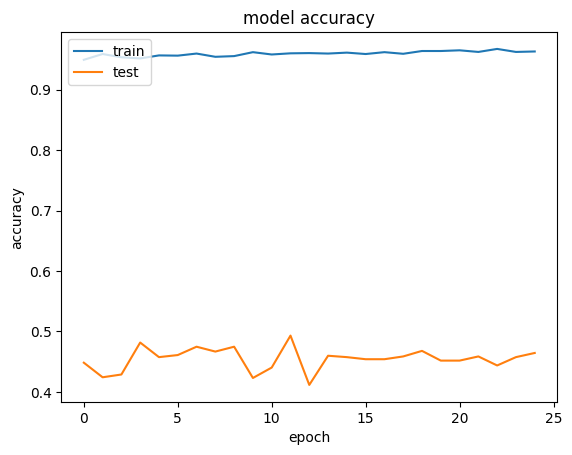

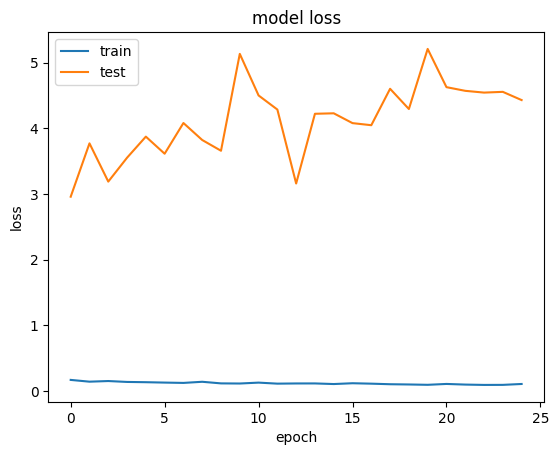

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], label="Training")
plt.plot(history.history['val_accuracy'], label ="Validation")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], label="Training")
plt.plot(history.history['val_loss'], label ="Validation")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 11. Make some pridiction using the trained Model

**load an image, preprocess it, and then use a trained model to predict what the image represents**

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=img_size)
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)

    index = np.argmax(prediction)

    plt.title("Prediction - {}".format(str(index).title()), size=18, color='red')
    plt.imshow(img_array)


**Predicating An Image**

1/1 [==============================] - 0s 33ms/step


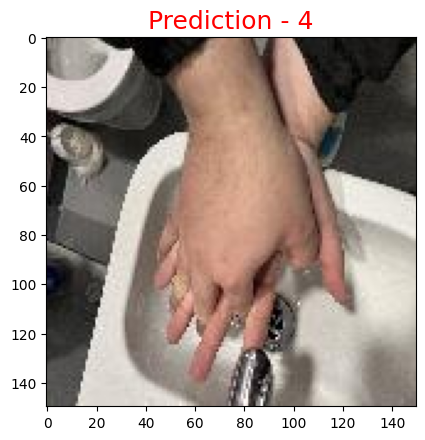

In [ ]:
predict_image('/content/dataset/CHS2406_Coursework2_Data_Repository/Stage4/10_Stage_4_u2079579.jpg', model)

**It Predict 4 which is correct**

**As the Accuracy we get is 46 Perfect So For improving the accuracy we are using Transfer learning. Transfer learning is a powerful technique in machine learning, particularly in the field of deep learning**

# Using Transfer learning for improved performance.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional layers of VGG16
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new model on top of the VGG16 base
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

**Now Traing The Model Again**

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

# Save the model
model.save('transter_model.h5')

Epoch 1/50
82/82 [==============================] - 22s 179ms/step - loss: 2.3313 - accuracy: 0.1392 - val_loss: 2.1150 - val_accuracy: 0.1908
Epoch 2/50
82/82 [==============================] - 8s 101ms/step - loss: 2.1498 - accuracy: 0.1760 - val_loss: 2.0523 - val_accuracy: 0.2057
Epoch 3/50
82/82 [==============================] - 8s 99ms/step - loss: 2.1049 - accuracy: 0.1863 - val_loss: 2.0055 - val_accuracy: 0.2839
Epoch 4/50
82/82 [==============================] - 8s 104ms/step - loss: 2.0338 - accuracy: 0.2232 - val_loss: 1.9411 - val_accuracy: 0.3586
Epoch 5/50
82/82 [==============================] - 8s 96ms/step - loss: 1.9581 - accuracy: 0.2749 - val_loss: 1.8664 - val_accuracy: 0.3747
Epoch 6/50
82/82 [==============================] - 8s 103ms/step - loss: 1.8899 - accuracy: 0.3018 - val_loss: 1.7708 - val_accuracy: 0.4184
Epoch 7/50
82/82 [==============================] - 9s 104ms/step - loss: 1.7908 - accuracy: 0.3393 - val_loss: 1.7401 - val_accuracy: 0.4437
Epoch 8

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**The Accuracy is Improved Now**

## Accuracy = 68%

**testing model on unseen test images**

In [ ]:
#### testing model on unseen test images
y_pred = model.predict(X_test)
#Convert class attribute back to its origional form, 0,1 from categorical [1. 0., 0. 1.]
y_actual = np.argmax(y_test,axis=1)
print(y_actual[0:25])
y_pred = np.argmax(y_pred,axis=1)
print(y_pred[0:25])

#Accuracy of the model on test dataset
print(classification_report(y_actual,y_pred))
print(confusion_matrix(y_actual,y_pred))
print(accuracy_score(y_actual,y_pred))


28/28 [==============================] - 3s 75ms/step
[1 7 4 7 5 5 7 7 1 3 4 2 5 4 7 2 7 5 3 8 8 1 2 4 3]
[1 7 4 7 5 5 4 7 1 3 4 8 8 1 7 2 7 8 5 8 1 1 2 4 3]
              precision    recall  f1-score   support

           1       0.83      0.84      0.84       109
           2       0.54      0.75      0.62       106
           3       0.80      0.66      0.72       114
           4       0.65      0.64      0.65       112
           5       0.64      0.72      0.68       107
           6       0.70      0.72      0.71       113
           7       0.73      0.64      0.68        97
           8       0.68      0.53      0.59       112

    accuracy                           0.69       870
   macro avg       0.70      0.69      0.69       870
weighted avg       0.70      0.69      0.69       870

[[92  2  1  1  6  4  2  1]
 [ 1 79  4  7  2  4  3  6]
 [ 0 17 75 12  4  2  0  4]
 [ 3 13  6 72  6  4  5  3]
 [ 5  6  1  2 77 10  2  4]
 [ 4  4  2  2  7 81  6  7]
 [ 2  6  0 10 11  3 62  3]
 [

**Visualizing Model Training Performance**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


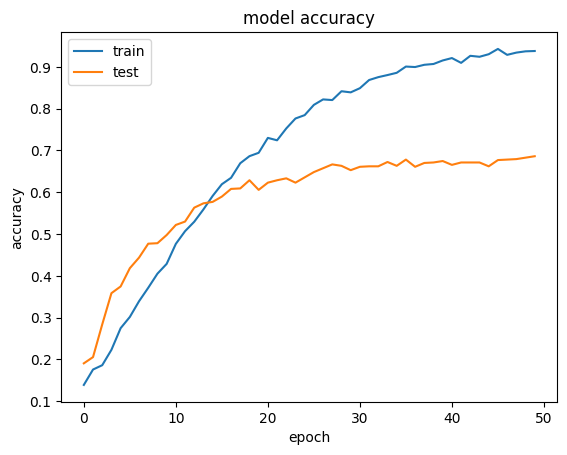

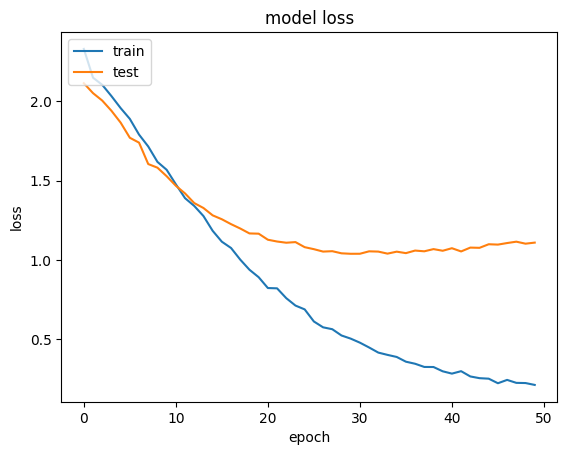

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], label="Training")
plt.plot(history.history['val_accuracy'], label ="Validation")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], label="Training")
plt.plot(history.history['val_loss'], label ="Validation")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 84ms/step


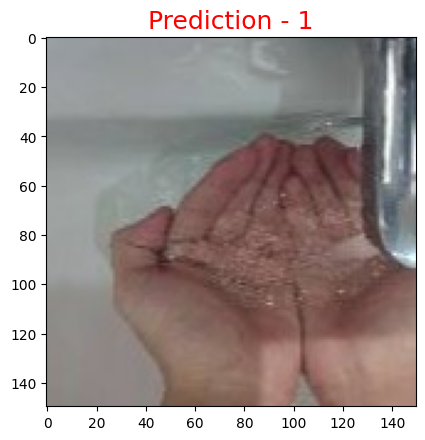

In [ ]:
predict_image('/content/drive/MyDrive/ummwew.JPG', model)

**Predicted Correctly**